# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [1]:
import pandas as pd
%matplotlib inline

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [6]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows=30000)
df.head(5)

Owner Zip Code   Animal Name Animal Gender         Primary Breed  \
0           10024     BLUE MACK             M               Unknown   
1           10461  Indie Zephir             M            Rottweiler   
2           10013         Bilal             M  Australian Cattledog   
3           10025         Buddy             M               Unknown   
4           10013           Ali             M               Basenji   

  Secondary Breed Animal Dominant Color Animal Secondary Color  \
0   AIREDALE TERR                 BROWN                  BLACK   
1             NaN                 BLACK                    TAN   
2             NaN                  Rust                    NaN   
3        Cockapoo                 BLOND                  WHITE   
4             NaN                 Black                    NaN   

  Animal Third Color Animal Birth Spayed or Neut Guard or Trained Vaccinated  \
0                NaN   2007-11-01            Yes               No        Yes   
1                NaN   2013-04-01             No               No        Yes   
2                NaN   2014-09-01            Yes              NaN         No   
3                NaN   2008-04-01            Yes               No        Yes   
4                NaN   2014-01-01             No              NaN         No   

         Application Date License Issued Date License Expired Date  
0 2012-09-19 16:01:19.647          2015-09-19           2016-09-19  
1 2013-09-20 11:41:36.647          2014-09-20           2018-09-20  
2 2014-09-12 13:13:36.713          2014-09-12           2019-09-12  
3 2014-09-12 15:26:51.417          2014-09-12           2017-10-20  
4 2014-09-12 15:43:17.707          2014-09-12           2019-09-12

## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [7]:
df.shape

(30000, 15)

In [8]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

Characteristics of dogs owned by NYC residents. "Owner Zip Code" indicates where the owner lives. "Vaccinated" indicates whether the dog is vaccinated against rabies.

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [ ]:
1. Do dog breeds vary by zip code? For instance, is there an excess of pitbulls in Bed-Stuy, or Lhasa apsos in 10021 (the East Side in the 60s and 70s)?
2. How many unvaccinated dogs exist in the city (and where are they?).
3. What's the percentage of dog that can conceive (i.e. unspayed females under, say, six years old)?
4. What is the most common dog color?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<AxesSubplot:>

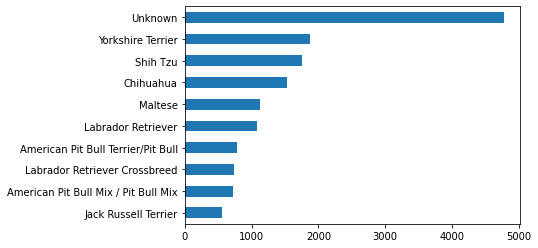

In [17]:
df['Primary Breed'].value_counts().sort_values().tail(10).plot(kind='barh')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<AxesSubplot:>

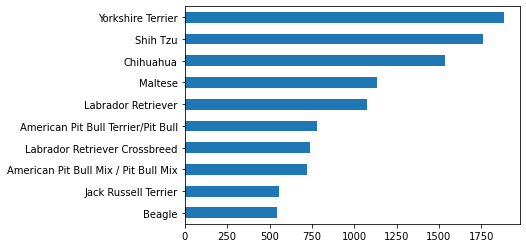

In [18]:
df[df['Primary Breed'] != 'Unknown']['Primary Breed'].value_counts().sort_values().tail(10).plot(kind='barh')

## What are the most popular dog names?

In [19]:
df['Animal Name'].value_counts().head(10)

UNKNOWN    203
Max        202
Unknown    197
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [30]:
df[df['Animal Name'] == 'Danny'].shape  # No Dans or Daniels but there are four dogs named Danny.

(4, 15)

In [26]:
df[df['Animal Name'] == 'Max'].shape

(202, 15)

In [27]:
df[df['Animal Name'] == 'Maxwell'].shape

(11, 15)

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [31]:
df['Guard or Trained'].value_counts(normalize=True)

No     0.999143
Yes    0.000857
Name: Guard or Trained, dtype: float64

## What are the actual numbers?

In [33]:
df['Guard or Trained'].value_counts()

No     19809
Yes       17
Name: Guard or Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

This dataset (every dataset, in fact) is full of NaNs. That has to account for the discrepancy.

In [34]:
df.head()

Owner Zip Code   Animal Name Animal Gender         Primary Breed  \
0           10024     BLUE MACK             M               Unknown   
1           10461  Indie Zephir             M            Rottweiler   
2           10013         Bilal             M  Australian Cattledog   
3           10025         Buddy             M               Unknown   
4           10013           Ali             M               Basenji   

  Secondary Breed Animal Dominant Color Animal Secondary Color  \
0   AIREDALE TERR                 BROWN                  BLACK   
1             NaN                 BLACK                    TAN   
2             NaN                  Rust                    NaN   
3        Cockapoo                 BLOND                  WHITE   
4             NaN                 Black                    NaN   

  Animal Third Color Animal Birth Spayed or Neut Guard or Trained Vaccinated  \
0                NaN   2007-11-01            Yes               No        Yes   
1                NaN   2013-04-01             No               No        Yes   
2                NaN   2014-09-01            Yes              NaN         No   
3                NaN   2008-04-01            Yes               No        Yes   
4                NaN   2014-01-01             No              NaN         No   

         Application Date License Issued Date License Expired Date  
0 2012-09-19 16:01:19.647          2015-09-19           2016-09-19  
1 2013-09-20 11:41:36.647          2014-09-20           2018-09-20  
2 2014-09-12 13:13:36.713          2014-09-12           2019-09-12  
3 2014-09-12 15:26:51.417          2014-09-12           2017-10-20  
4 2014-09-12 15:43:17.707          2014-09-12           2019-09-12

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [36]:
df['Guard or Trained'].fillna("No", inplace=True)

In [37]:
df['Guard or Trained'].value_counts()

No     29983
Yes       17
Name: Guard or Trained, dtype: int64

Wow. Over 10,000 NaNs!

## What are the top dog breeds for guard dogs? 

In [38]:
df[df['Guard or Trained'] == 'Yes']['Primary Breed'].value_counts()

Unknown                       5
German Shepherd Dog           3
Labrador Retriever            1
Doberman Pinscher             1
German Shepherd Crossbreed    1
Poodle, Standard              1
Golden Retriever              1
Rottweiler                    1
Shih Tzu                      1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [41]:
df['year'] = df['Animal Birth'].apply(lambda birth: birth.year)
df.head()

Owner Zip Code   Animal Name Animal Gender         Primary Breed  \
0           10024     BLUE MACK             M               Unknown   
1           10461  Indie Zephir             M            Rottweiler   
2           10013         Bilal             M  Australian Cattledog   
3           10025         Buddy             M               Unknown   
4           10013           Ali             M               Basenji   

  Secondary Breed Animal Dominant Color Animal Secondary Color  \
0   AIREDALE TERR                 BROWN                  BLACK   
1             NaN                 BLACK                    TAN   
2             NaN                  Rust                    NaN   
3        Cockapoo                 BLOND                  WHITE   
4             NaN                 Black                    NaN   

  Animal Third Color Animal Birth Spayed or Neut Guard or Trained Vaccinated  \
0                NaN   2007-11-01            Yes               No        Yes   
1                NaN   2013-04-01             No               No        Yes   
2                NaN   2014-09-01            Yes               No         No   
3                NaN   2008-04-01            Yes               No        Yes   
4                NaN   2014-01-01             No               No         No   

         Application Date License Issued Date License Expired Date  year  
0 2012-09-19 16:01:19.647          2015-09-19           2016-09-19  2007  
1 2013-09-20 11:41:36.647          2014-09-20           2018-09-20  2013  
2 2014-09-12 13:13:36.713          2014-09-12           2019-09-12  2014  
3 2014-09-12 15:26:51.417          2014-09-12           2017-10-20  2008  
4 2014-09-12 15:43:17.707          2014-09-12           2019-09-12  2014

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [43]:
df['age'] = 2021 - df['year']
df.age.describe()

count    30000.000000
mean        11.712433
std          4.066803
min          6.000000
25%          8.000000
50%         11.000000
75%         15.000000
max         37.000000
Name: age, dtype: float64

Our dogs are OLD! But the 37-year-old dog (259 in dog years) doesn't exist - that's a typo (or unwarranted boasting).

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [44]:
zipcodes_df = pd.read_csv("zipcodes-neighborhoods.csv")
zipcodes_df.head()

neighborhood    zip borough
0           Central Bronx  10453   Bronx
1           Central Bronx  10457   Bronx
2           Central Bronx  10460   Bronx
3  Bronx Park and Fordham  10458   Bronx
4  Bronx Park and Fordham  10467   Bronx

## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [46]:
merged = df.merge(zipcodes_df, left_on='Owner Zip Code', right_on='zip')
merged.head()

Owner Zip Code Animal Name Animal Gender                     Primary Breed  \
0           10024   BLUE MACK             M                           Unknown   
1           10024       Louie             M                           Unknown   
2           10024       Tosha             F               Collie, Smooth Coat   
3           10024     Poppett             F  Dachshund, Long Haired Miniature   
4           10024      Harlen             M                           Unknown   

  Secondary Breed Animal Dominant Color Animal Secondary Color  \
0   AIREDALE TERR                 BROWN                  BLACK   
1       Coonhound                 Black                  White   
2             NaN            BLUE MERLE                  WHITE   
3             NaN                 Black                  Brown   
4     Plott Hound                 BLACK                    TAN   

  Animal Third Color Animal Birth Spayed or Neut Guard or Trained Vaccinated  \
0                NaN   2007-11-01            Yes               No        Yes   
1              Brown   2008-05-01            Yes               No        Yes   
2                TAN   2011-12-01            Yes               No        Yes   
3             Silver   2011-02-01            Yes               No        Yes   
4              BROWN   2007-05-01            Yes               No        Yes   

         Application Date License Issued Date License Expired Date  year  age  \
0 2012-09-19 16:01:19.647          2015-09-19           2016-09-19  2007   14   
1 2014-09-15 16:36:20.200          2014-09-15           2017-09-03  2008   13   
2 2014-09-16 10:22:07.867          2014-09-16           2017-10-11  2011   10   
3 2014-09-18 16:25:57.323          2014-09-18           2019-09-18  2011   10   
4 2014-09-25 17:11:20.713          2014-09-25           2016-08-20  2007   14   

      neighborhood    zip    borough  
0  Upper West Side  10024  Manhattan  
1  Upper West Side  10024  Manhattan  
2  Upper West Side  10024  Manhattan  
3  Upper West Side  10024  Manhattan  
4  Upper West Side  10024  Manhattan

In [47]:
merged[merged.borough == 'Bronx']['Animal Name'].value_counts().head()

Bella      22
Max        21
Rocky      20
Unknown    16
Lucky      15
Name: Animal Name, dtype: int64

In [48]:
merged[merged.borough == 'Brooklyn']['Animal Name'].value_counts().head()

Unknown    97
Max        46
Bella      45
unknown    45
UNKNOWN    45
Name: Animal Name, dtype: int64

In [49]:
merged[merged.neighborhood == 'Lower East Side']['Animal Name'].value_counts().head()

UNKNOWN    19
Lucy        8
Lily        7
Max         6
Charlie     6
Name: Animal Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [52]:
pd.set_option("display.max_rows", None)
merged.groupby('neighborhood')['Primary Breed'].value_counts().groupby(level=0).nlargest(1)

neighborhood                   neighborhood                   Primary Breed
Borough Park                   Borough Park                   Unknown          108
Bronx Park and Fordham         Bronx Park and Fordham         Unknown           51
Bushwick and Williamsburg      Bushwick and Williamsburg      Unknown           88
Canarsie and Flatlands         Canarsie and Flatlands         Unknown           75
Central Bronx                  Central Bronx                  Unknown           30
Central Brooklyn               Central Brooklyn               Unknown           94
Central Harlem                 Central Harlem                 Unknown           81
Central Queens                 Central Queens                 Unknown           49
Chelsea and Clinton            Chelsea and Clinton            Unknown          231
East Harlem                    East Harlem                    Unknown           50
East New York and New Lots     East New York and New Lots     Unknown           26
Flatbush   

In [53]:
merged.groupby('neighborhood')['Primary Breed'] \
    .value_counts() \
    .groupby(level=0, group_keys=False) \
    .nlargest(3) \
    .to_frame()

Primary Breed
neighborhood                  Primary Breed                                      
Borough Park                  Unknown                                         108
                              Yorkshire Terrier                                49
                              Maltese                                          34
Bronx Park and Fordham        Unknown                                          51
                              Yorkshire Terrier                                39
                              Shih Tzu                                         33
Bushwick and Williamsburg     Unknown                                          88
                              Yorkshire Terrier                                47
                              Chihuahua                                        40
Canarsie and Flatlands        Unknown                                          75
                              Shih Tzu                                         56
                              Yorkshire Terrier                                48
Central Bronx                 Unknown                                          30
                              Yorkshire Terrier                                29
                              Shih Tzu                                         24
Central Brooklyn              Unknown                                          94
                              Shih Tzu                                         52
                              Yorkshire Terrier                                41
Central Harlem                Unknown                                          81
                              Chihuahua                                        48
                              Yorkshire Terrier                                44
Central Queens                Unknown                                          49
                              Yorkshire Terrier                                34
                              Shih Tzu                                         27
Chelsea and Clinton           Unknown                                         231
                              Chihuahua                                        80
                              Yorkshire Terrier                                77
East Harlem                   Unknown                                          50
                              Yorkshire Terrier                                44
                              Shih Tzu                                         41
East New York and New Lots    Unknown                                          26
                              Yorkshire Terrier                                25
                              American Pit Bull Terrier/Pit Bull               24
Flatbush                      Unknown                                          74
                              Shih Tzu                                         38
                              Yorkshire Terrier                                35
Gramercy Park and Murray Hill Unknown                                         134
                              Yorkshire Terrier                                52
                              Shih Tzu                                         48
Greenpoint                    Unknown                                          85
                              Chihuahua                                        40
                              Shih Tzu                                         25
Greenwich Village and Soho    Unknown                                         110
                              Labrador Retriever                               35
                              Yorkshire Terrier                                29
High Bridge and Morrisania    Unknown                                          34
                              Shih Tzu                                         33
                              Chihuahua           

## What breed of dogs are the least likely to be spayed? Male or female?

In [54]:
df.groupby('Animal Gender')['Spayed or Neut'].value_counts()

Animal Gender  Spayed or Neut
               Yes                   3
F              Yes               11786
               No                 1953
M              Yes               12874
               No                 3384
Name: Spayed or Neut, dtype: int64

In [55]:
df.groupby('Animal Gender')['Spayed or Neut'].value_counts(normalize=True)

Animal Gender  Spayed or Neut
               Yes               1.000000
F              Yes               0.857850
               No                0.142150
M              Yes               0.791856
               No                0.208144
Name: Spayed or Neut, dtype: float64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [56]:
df['monochrome'] = (
    (df['Animal Dominant Color'].str.lower() == 'black') |
    (df['Animal Dominant Color'].str.lower() == 'white') |
    (df['Animal Dominant Color'].str.lower() == 'grey') |
    (df['Animal Dominant Color'].isna())
) & (
    (df['Animal Secondary Color'].str.lower() == 'black') |
    (df['Animal Secondary Color'].str.lower() == 'white') |
    (df['Animal Secondary Color'].str.lower() == 'grey') |
    (df['Animal Secondary Color'].isna())
) & (
    (df['Animal Third Color'].str.lower() == 'black') |
    (df['Animal Third Color'].str.lower() == 'white') |
    (df['Animal Third Color'].str.lower() == 'grey') |
    (df['Animal Third Color'].isna())
)

In [57]:
df['monochrome'] = (
    df['Animal Dominant Color'].str.lower().isin(['black', 'white', 'grey']) | df['Animal Dominant Color'].isna()
) & (
    df['Animal Secondary Color'].str.lower().isin(['black', 'white', 'grey']) | df['Animal Secondary Color'].isna()
) & (
    df['Animal Third Color'].str.lower().isin(['black', 'white', 'grey']) | df['Animal Third Color'].isna()
)

In [60]:
df[df['monochrome']]

Owner Zip Code                                        Animal Name  \
4               10013                                                Ali   
9               10013                                         IAN          
15              11215                                      Lucy Moo Jung   
16              10025                              Apple Wazowski Panwar   
17              10312                                              Buddy   
22              11201                                            Massimo   
29              10011                                         OTIS         
34              10305                                             Ranger   
38              11209                                            JASMINE   
39              10471                                             Elaine   
41              10023                                               Joey   
52              10029                                              Chloe   
55              10467                                              Angel   
56              10467                                         PEPI         
63              10309                                        Coco Chanel   
65              10034                                               Blue   
72              11106                                            Sabrina   
78              11236                                            Ty Yuen   
81              11217                                         Caipirinha   
95              11101                                                Zoe   
96              11220                                             Archie   
97              10475                                          Zoe Molia   
104             11385                                           chispita   
105             11201                                               Gigi   
106             11365                                            Jack Ho   
113             11215                                         Moneypenny   
114             10463                                         Kate David   
115             10463                                           Phillip    
116             10463                                           William    
117             10463                                            Apollo    
121             11215                       Curtis Goodwin Goings-Bowser   
124             10023                          Butterfly Novelli Pigatto   
131             11354                                               abby   
132             11214                                       Coco Lemchuk   
136             10027                                        Coco Wilson   
151             11427                                            Ginger    
155             10017                                              Patch   
159             11231                                         ZOE          
162             10463                                     Chauncey Polan   
163             10019                                               ROXY   
167             11224                                                BLU   
173             11377                                             Stella   
174             11361                                                Max   
176             10022                                             Marley   
177             10022                                             Cooper   
178             10128                                              Fiona   
182             10011                                              CHUNK   
183             10012                                              PIPER   
187             10310                                             Rascal   
192             10026                                         OREO MARIN   
197             10033                                               Kami   
209             10040                                  

## How many dogs are in each borough? Plot it in a graph.

<AxesSubplot:>

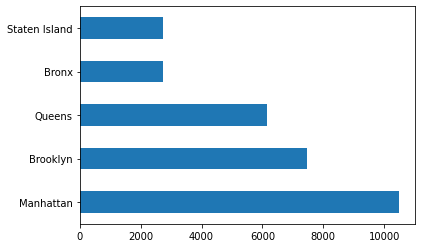

In [61]:
merged['borough'].value_counts().plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [62]:
counts = merged['borough'].value_counts().reset_index()
counts

index  borough
0      Manhattan    10478
1       Brooklyn     7466
2         Queens     6154
3          Bronx     2748
4  Staten Island     2727

In [63]:
pop = pd.read_csv("boro_population.csv")
pop

borough  population  area_sqmi
0      Manhattan     1644518         23
1          Bronx     1455444         42
2       Brooklyn     2636735         71
3         Queens     2339150        109
4  Staten Island      474558         59

In [64]:
counts_with_pop = counts.merge(pop, left_on='index', right_on='borough')
counts_with_pop

index  borough_x      borough_y  population  area_sqmi
0      Manhattan      10478      Manhattan     1644518         23
1       Brooklyn       7466       Brooklyn     2636735         71
2         Queens       6154         Queens     2339150        109
3          Bronx       2748          Bronx     1455444         42
4  Staten Island       2727  Staten Island      474558         59

In [65]:
# Per 1k people
counts_with_pop['per_capita'] = counts_with_pop['borough_x'] / counts_with_pop['population'] * 1000
counts_with_pop

index  borough_x      borough_y  population  area_sqmi  per_capita
0      Manhattan      10478      Manhattan     1644518         23    6.371472
1       Brooklyn       7466       Brooklyn     2636735         71    2.831532
2         Queens       6154         Queens     2339150        109    2.630870
3          Bronx       2748          Bronx     1455444         42    1.888084
4  Staten Island       2727  Staten Island      474558         59    5.746400

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

In [66]:
merged.groupby('borough')['Primary Breed'].value_counts() \
    .groupby(level=0, group_keys=False) \
    .nlargest(5) \
    .to_frame(name='counts') \
    .reset_index()

borough                       Primary Breed  counts
0           Bronx                             Unknown     404
1           Bronx                   Yorkshire Terrier     250
2           Bronx                            Shih Tzu     244
3           Bronx                           Chihuahua     208
4           Bronx  American Pit Bull Terrier/Pit Bull     181
5        Brooklyn                             Unknown    1150
6        Brooklyn                   Yorkshire Terrier     501
7        Brooklyn                            Shih Tzu     481
8        Brooklyn                           Chihuahua     391
9        Brooklyn                  Labrador Retriever     255
10      Manhattan                             Unknown    1619
11      Manhattan                           Chihuahua     511
12      Manhattan                   Yorkshire Terrier     505
13      Manhattan                            Shih Tzu     454
14      Manhattan                  Labrador Retriever     422
15         Queens                             Unknown    1040
16         Queens                   Yorkshire Terrier     434
17         Queens                            Shih Tzu     395
18         Queens                           Chihuahua     306
19         Queens                             Maltese     305
20  Staten Island                             Unknown     501
21  Staten Island                   Yorkshire Terrier     171
22  Staten Island                            Shih Tzu     165
23  Staten Island                  Labrador Retriever     123
24  Staten Island                           Chihuahua     100

<AxesSubplot:ylabel='borough,Primary Breed'>

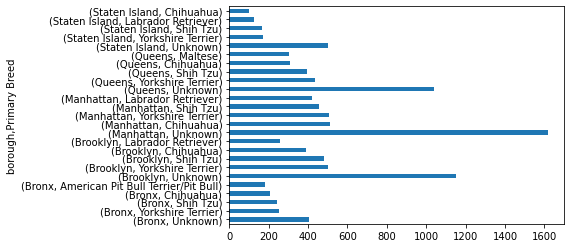

In [67]:
merged.groupby('borough')['Primary Breed'].value_counts() \
    .groupby(level=0, group_keys=False) \
    .nlargest(5) \
    .plot(kind='barh')

## What percentage of dogs are not guard dogs?

In [68]:
df['Guard or Trained'].value_counts(normalize=True, dropna=False)

No     0.999433
Yes    0.000567
Name: Guard or Trained, dtype: float64